# Exploratory Data Analysis with Youtube Video Data from Netflix

In [1]:
api_key = input('Enter api key\n')


Enter api key
2313131sadadada


In [2]:
channel_id = ['UCWOA1ZGywLbqmigxE4Qlvuw']

In [ ]:
import pandas as pd
from IPython.display import JSON
from IPython.display import display

import numpy as np
from dateutil import parser
import isodate

# Google API
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
from googleapiclient.discovery import build

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [ ]:
pip install --upgrade google-api-python-client

In [ ]:
#PRECODE

api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id= channel_id
)

response = request.execute()

from IPython.display import display
response = request.execute()
display(response)

{'kind': 'youtube#channelListResponse',
 'etag': 'h43n1WOjfpzCrS184pa72vGHJ6A',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': '3KhXzHIGwTZsD_ILGtU39wUbhDM',
   'id': 'UCWOA1ZGywLbqmigxE4Qlvuw',
   'snippet': {'title': 'Netflix',
    'description': "queen charlotte ❤️ \n\nGet Netflix's latest trailers and updates here! Netflix is the world's leading streaming entertainment service with over 209 million paid memberships in over 190 countries enjoying TV series, documentaries, feature films , and games across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching at any time.\n",
    'customUrl': '@netflix',
    'publishedAt': '2012-07-17T20:45:36Z',
    'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AGIKgqN1F5HXRCFl48NA5bwfOJsdLakGKcwyJrcZ31fkGQ=s88-c-k-c0x00ffffff-no-rj',
      'width': 88,
    

In [ ]:
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(
        part="snippet,statistics,contentDetails",
        id=channel_id
    )
    response = request.execute()

    all_data = []
    
    # Loop through items
    for item in response['items']:
        data = {
            'channelName': item['snippet']['title'],
            'subscribers': item['statistics']['subscriberCount'],
            'views': item['statistics']['viewCount'],
            'totalVideos': item['statistics']['videoCount'],
            'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)
        
    return pd.DataFrame(all_data)


In [ ]:
channel_stats = get_channel_stats(youtube, channel_id)

In [ ]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Netflix,26400000,6920184031,6344,UUWOA1ZGywLbqmigxE4Qlvuw


In [ ]:
#PRECODE

request = youtube.playlistItems().list(
    part="snippet,contentDetails",
    playlistId="UUWOA1ZGywLbqmigxE4Qlvuw"
)
response = request.execute()


from IPython.display import display
response = request.execute()
display(response)

{'kind': 'youtube#playlistItemListResponse',
 'etag': 'XiXh7mnv6AA-DoltoCC5EIWSPmY',
 'nextPageToken': 'EAAaBlBUOkNBVQ',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': 'qwTaBy3oZgXMBVEyLnPX31JQSp4',
   'id': 'VVVXT0ExWkd5d0xicW1pZ3hFNFFsdnV3LjZWUXJKSzFLUVpF',
   'snippet': {'publishedAt': '2023-05-26T15:28:00Z',
    'channelId': 'UCWOA1ZGywLbqmigxE4Qlvuw',
    'title': 'Manifest | Season 4 Part 1 Recap | Netflix',
    'description': "All will be revealed. Catch up on what's happened on Manifest before diving into the final episodes on June 2nd.\n\nSUBSCRIBE: http://bit.ly/29qBUt7\n\nAbout Netflix:\nNetflix is one of the world's leading entertainment services with 233 million paid memberships in over 190 countries enjoying TV series, films and games across a wide variety of genres and languages. Members can play, pause and resume watching as much as they want, anytime, anywhere, and can change their plans at any time.\n\nManifest | Season 4 Part 1 Recap | Netflix\nhttps://www.yo

In [ ]:
playlist_id = "UUWOA1ZGywLbqmigxE4Qlvuw"

def get_video_ids(youtube, playlist_id):
    video_ids = []
    
    request = youtube.playlistItems().list(
                part="snippet,contentDetails",
                playlistId = playlist_id, 
                maxResults = 50)
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token= response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part="snippet,contentDetails",
                    playlistId = playlist_id, 
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()
        
        for item in response ['items']:
            video_ids.append(item['contentDetails']['videoId'])
            
        next_page_token = response.get('nextPageToken')
    
    return video_ids

In [ ]:
video_ids =get_video_ids(youtube, playlist_id)

In [ ]:
len(video_ids)

6344

In [ ]:
video_ids

['6VQrJK1KQZE',
 '3FzJpbtK5Wg',
 '-VSNFufVYdI',
 'Vh0E3ZGvyc0',
 'n6j5v5UQQRo',
 '4xuRTMQlwbM',
 'OZXhvVikKTo',
 '3YL7uguvtlE',
 'kJoT7Tm_byw',
 'sKbiXcQ9Qpw',
 'sMv0YVVnabY',
 'A2JBIdZ0tPU',
 'lem5MklI5ow',
 'sAuKzsgAjEo',
 'ltJv7hkNGxY',
 'n4tjqqGgky8',
 'N3gNzLjYwCE',
 'rblA5nul1Mg',
 '328sDexhpo0',
 'Cisp6EVm0Io',
 'dNiCqNUH85U',
 '5LvVaQPNqHU',
 'eibcrhU718E',
 'Y274jZs5s7s',
 'Q7hUc8HVSFk',
 'XANarv2Dg0U',
 'cEvq0i3quNw',
 'RlcV3cNKD_c',
 'jBupl81yAEQ',
 'vjS4OhgOFYA',
 'rJdIRMolhE8',
 'x2AEI26LBpA',
 'IFPovTGI8hA',
 'IemUKB4kCWM',
 'lT4EY1i6ZDs',
 'QwHM63RIHbQ',
 '47B41ouPToE',
 '8Yt1D8rj_RA',
 'qmSUPyOSvEs',
 'Ab-05ybMncs',
 'a9zkEqVoiv0',
 'v0lam6K0hDo',
 'Q7KJdjG9HRc',
 'C9dSJxkmJbk',
 'O1-ELdJiX0k',
 'KZKvOzlYit4',
 'mqNzrsUerYw',
 'xrqvO46QR2E',
 'JtgKAyxfM1k',
 'JoZaGvTpYTU',
 'eS6GkydzCRg',
 'N-pea_gC0bg',
 'xUPrHJado9U',
 'E1KDuaPrUaY',
 'Se26Op9sEC8',
 '_Bs1F8PRP1Y',
 '_MqT7NQY_kQ',
 'k7uFcpF0pXk',
 'EUYf63tpFPI',
 'bH2oflDyMdY',
 'jE7KWuHKWUA',
 'j4HadbaMF8w',
 '_tHdyD

In [ ]:
def get_video_details(youtube, video_ids):
    all_video_info =[]

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_ids[i:i+50]
        )
        response = request.execute()
        response

        for video in response['items']:
            stats_to_keep = {'snippet':['channelTitle','title','description', 'tags', 'publishedAt'],
                            'statistics':['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                            'contentDetails':['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None
            all_video_info.append(video_info)

    return pd.DataFrame(all_video_info)

In [ ]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,6VQrJK1KQZE,Netflix,Manifest | Season 4 Part 1 Recap | Netflix,All will be revealed. Catch up on what's happe...,"[Daryl Edwards, Death Date, Holly Taylor, J.R....",2023-05-26T15:28:00Z,31384,1197,None,66,PT1M36S,hd,true
1,3FzJpbtK5Wg,Netflix,I Think You Should Leave with Tim Robinson | S...,It's show time. Season 3 of I Think You Should...,"[AYO EDEBIRI, BECK BENNETT, BIFF WIFF, CARMEN ...",2023-05-24T18:00:00Z,395412,5789,None,532,PT1M50S,hd,true
2,-VSNFufVYdI,Netflix,Survival Of The Thickest | Teaser | Netflix,"Meet Mavis Beaumont. She’s proudly thick, newl...","[A24, Anissa Felix, Michelle Buteau, Michelle ...",2023-05-24T16:00:00Z,58833,1866,None,166,PT1M3S,hd,false
3,Vh0E3ZGvyc0,Netflix,New on Netflix | June 2023,"New episodes of The Witcher and Black Mirror, ...","[action, adventure, anime, black mirror, chris...",2023-05-24T14:00:00Z,37060,970,None,121,PT8M38S,hd,true
4,n6j5v5UQQRo,Netflix,New on Netflix Canada | June 2023,"New episodes of The Witcher and Black Mirror, ...","[action, adventure, anime, black mirror, chris...",2023-05-24T14:00:00Z,5533,106,None,18,PT8M13S,hd,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,UCKhK-5uRr8,Netflix,Summit On Ice | Goal of the Century | Netflix,September 2012 marks the 40th Anniversary of t...,"[Hockey, Ice, (Sport)]",2012-09-26T20:41:09Z,6423,81,None,30,PT1M7S,hd,false
6340,RoTGW8QMuPA,Netflix,New Netflix Experience on Android | Netflix,"Compared to the previous version, the new Netf...","[netflix, smartphone, Netflix, Netflix Origina...",2012-09-24T06:00:50Z,47833,374,None,97,PT1M40S,hd,false
6341,LwZH0lg0XUM,Netflix,New Netflix Experience on iPhone | Netflix,The new Netflix experience on iPhone and iPod ...,"[Netflix, iPhone, iPod touch, streaming, movie...",2012-09-18T15:30:01Z,72085,779,None,189,PT1M49S,hd,false
6342,8R02NE050Jk,Netflix,Jiro Dreams of Sushi now on Netflix! | Netflix,"At 85 years old, Jiro Ono is considered by man...","[Jiro Ono, Sushi, David Gelb, Tuna, Michelin s...",2012-08-27T23:01:10Z,331666,2125,None,133,PT2M29S,hd,false


In [ ]:
def get_Comments_in_videos(youtube, video_ids):
    all_comments = []
    
    for video_id in video_ids:
        try:
            request = youtube.commentThreads().list(
                part="snippet, replies",
                videoId=video_id
            )
            response = request.execute()
            
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}
            
            all_comments.append(comments_in_video_info)
            
        except:
            # When an error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)



In [ ]:
from googleapiclient.errors import HttpError

# Data Pre-Processing

In [ ]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [ ]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [ ]:
# Convert count columns to numeric
numeric_cols = ['viewCount','likeCount','favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [ ]:
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [ ]:
# convert duration to seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [ ]:
video_df[['durationSecs', 'duration']] 

,durationSecs,duration
0,96.0,PT1M36S
1,110.0,PT1M50S
2,63.0,PT1M3S
3,518.0,PT8M38S
4,493.0,PT8M13S
...,...,...
6339,67.0,PT1M7S
6340,100.0,PT1M40S
6341,109.0,PT1M49S
6342,149.0,PT2M29S


In [ ]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [ ]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,6VQrJK1KQZE,Netflix,Manifest | Season 4 Part 1 Recap | Netflix,All will be revealed. Catch up on what's happe...,"[Daryl Edwards, Death Date, Holly Taylor, J.R....",2023-05-26 15:28:00+00:00,31384.0,1197.0,NaN,66.0,PT1M36S,hd,true,Friday,96.0,24
1,3FzJpbtK5Wg,Netflix,I Think You Should Leave with Tim Robinson | S...,It's show time. Season 3 of I Think You Should...,"[AYO EDEBIRI, BECK BENNETT, BIFF WIFF, CARMEN ...",2023-05-24 18:00:00+00:00,395412.0,5789.0,NaN,532.0,PT1M50S,hd,true,Wednesday,110.0,24
2,-VSNFufVYdI,Netflix,Survival Of The Thickest | Teaser | Netflix,"Meet Mavis Beaumont. She’s proudly thick, newl...","[A24, Anissa Felix, Michelle Buteau, Michelle ...",2023-05-24 16:00:00+00:00,58833.0,1866.0,NaN,166.0,PT1M3S,hd,false,Wednesday,63.0,13
3,Vh0E3ZGvyc0,Netflix,New on Netflix | June 2023,"New episodes of The Witcher and Black Mirror, ...","[action, adventure, anime, black mirror, chris...",2023-05-24 14:00:00+00:00,37060.0,970.0,NaN,121.0,PT8M38S,hd,true,Wednesday,518.0,31
4,n6j5v5UQQRo,Netflix,New on Netflix Canada | June 2023,"New episodes of The Witcher and Black Mirror, ...","[action, adventure, anime, black mirror, chris...",2023-05-24 14:00:00+00:00,5533.0,106.0,NaN,18.0,PT8M13S,hd,true,Wednesday,493.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,UCKhK-5uRr8,Netflix,Summit On Ice | Goal of the Century | Netflix,September 2012 marks the 40th Anniversary of t...,"[Hockey, Ice, (Sport)]",2012-09-26 20:41:09+00:00,6423.0,81.0,NaN,30.0,PT1M7S,hd,false,Wednesday,67.0,3
6340,RoTGW8QMuPA,Netflix,New Netflix Experience on Android | Netflix,"Compared to the previous version, the new Netf...","[netflix, smartphone, Netflix, Netflix Origina...",2012-09-24 06:00:50+00:00,47833.0,374.0,NaN,97.0,PT1M40S,hd,false,Monday,100.0,16
6341,LwZH0lg0XUM,Netflix,New Netflix Experience on iPhone | Netflix,The new Netflix experience on iPhone and iPod ...,"[Netflix, iPhone, iPod touch, streaming, movie...",2012-09-18 15:30:01+00:00,72085.0,779.0,NaN,189.0,PT1M49S,hd,false,Tuesday,109.0,19
6342,8R02NE050Jk,Netflix,Jiro Dreams of Sushi now on Netflix! | Netflix,"At 85 years old, Jiro Ono is considered by man...","[Jiro Ono, Sushi, David Gelb, Tuna, Michelin s...",2012-08-27 23:01:10+00:00,331666.0,2125.0,NaN,133.0,PT2M29S,hd,false,Monday,149.0,21


# EDA

In [ ]:
duplicates = video_df['title'].duplicated()
print(duplicates)


0       False
1       False
2       False
3       False
4       False
        ...  
6339    False
6340    False
6341    False
6342    False
6343    False
Name: title, Length: 6255, dtype: bool


In [ ]:
num_duplicates = duplicates.sum()
print(f"Number of duplicate titles: {num_duplicates}")


Number of duplicate titles: 0


In [ ]:
video_df = video_df.drop_duplicates(subset='title', keep='last')


In [ ]:
channel_data = get_channel_stats(youtube, channel_id)
print(channel_data)

  channelName subscribers       views totalVideos                playlistId
0     Netflix    26400000  6920184031        6344  UUWOA1ZGywLbqmigxE4Qlvuw


channel_data is currently in string format, so I will convert them into numeric so that we can visualize and do numeric operations on them

In [ ]:
# Convert count columns to numeric columns
numeric_cols = ['subscribers', 'views', 'totalVideos']
channel_data[numeric_cols] = channel_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Create a dataframe with video statistics and comments from all channels

video_df = pd.DataFrame()
comments_df = pd.DataFrame()

for c in channel_data['channelName'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data['channelName']== c, 'playlistId'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    
    # get video data
    video_data = get_video_details(youtube, video_ids)
    # get comment data
    comments_data = get_Comments_in_videos(youtube, video_ids)

    # append video data together and comment data toghether
    video_df = video_df.append(video_data, ignore_index=True)
    comments_df = comments_df.append(comments_data, ignore_index=True)

Getting video information from channel: Netflix
Could not get comments for video dNiCqNUH85U
Could not get comments for video IktHcPyNlv4
Could not get comments for video ZKE2DC7Xzog
Could not get comments for video siRxWiNeJ_g
Could not get comments for video tZylTiyaWV8
Could not get comments for video PgSYux7UcXU
Could not get comments for video l3oHWQleUJ0
Could not get comments for video MYy7oGQiSqI
Could not get comments for video RUkKSYcWvxI
Could not get comments for video TRTGOwQD8io
Could not get comments for video IAxDaDw7TfM
Could not get comments for video DibCYmZbPvQ
Could not get comments for video XccMANP-yOU
Could not get comments for video Pa_PRDVpjSk
Could not get comments for video SD_GlWPgS7Y
Could not get comments for video iTCORhleUWQ
Could not get comments for video wt51dl23OfQ
Could not get comments for video 2PmJX59vvXQ
Could not get comments for video 1if_93CvlNE
Could not get comments for video uWIRyU5fuzU
Could not get comments for video xsKARk379sw
Could n

## BEST PERFORMING

C:\Users\pranjal\AppData\Local\Temp\ipykernel_2460\1588454699.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


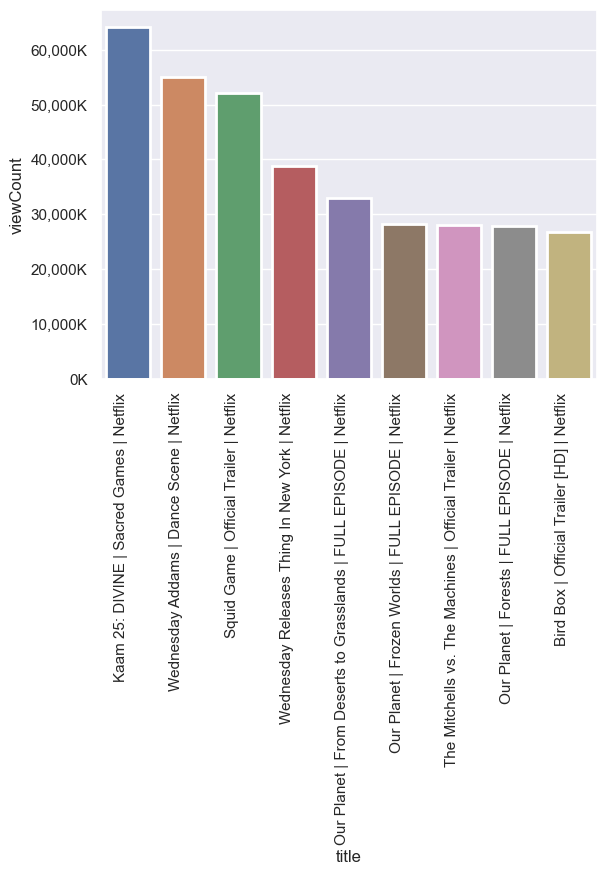

In [ ]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9], linewidth=2)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))
plt.tight_layout()
plt.show()

## WORST PERFORMING

C:\Users\pranjal\AppData\Local\Temp\ipykernel_2460\2042463630.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


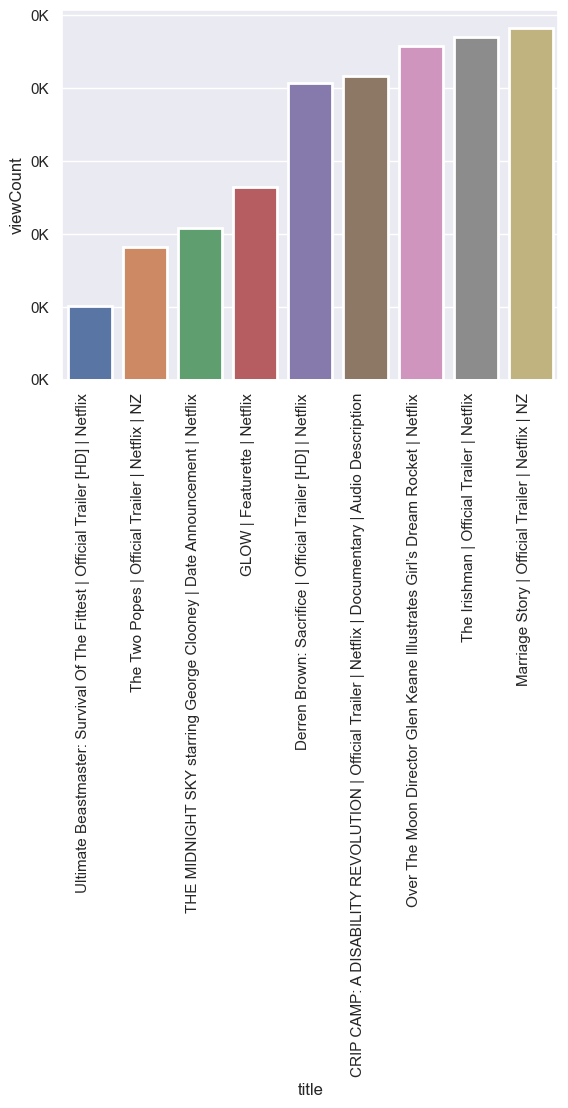

In [ ]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9], linewidth=2)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))
plt.tight_layout()
plt.show()

## VIEW DISTRIBUTION PER VIDEO

<Axes: xlabel='channelTitle', ylabel='viewCount'>

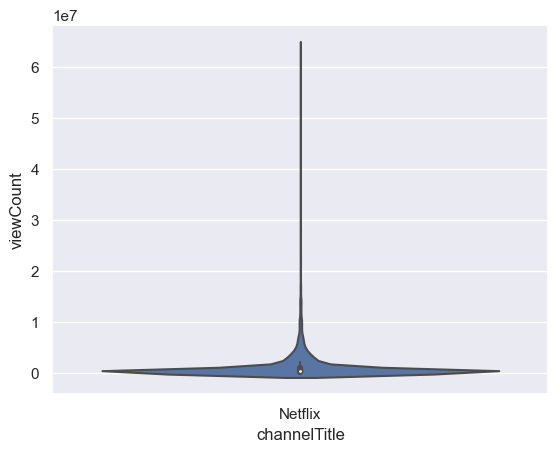

In [ ]:
sns.violinplot(x=video_df['channelTitle'], y=video_df['viewCount'])


## VIEWS VS LIKES AND COMMENTS

<Axes: xlabel='likeCount', ylabel='viewCount'>

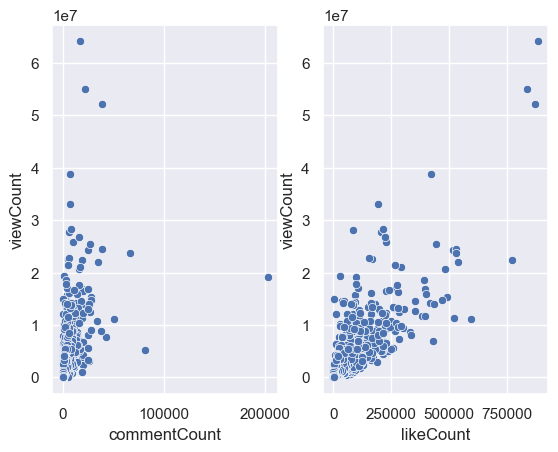

In [ ]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])


## video duration

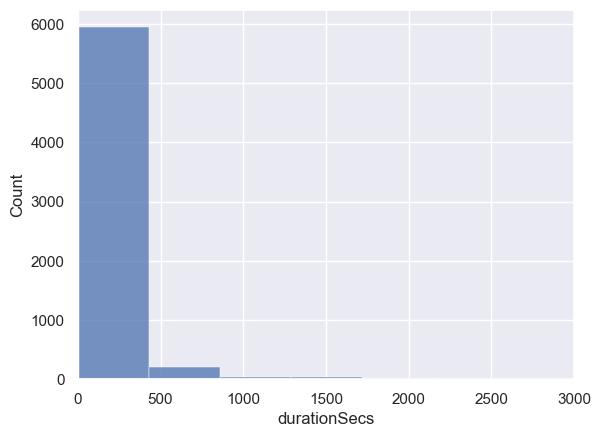

In [ ]:
sns.histplot(data=video_df, x='durationSecs', bins=100)
plt.xlim(0, 3000)  # Adjust the range of the x-axis
plt.show()

In [ ]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


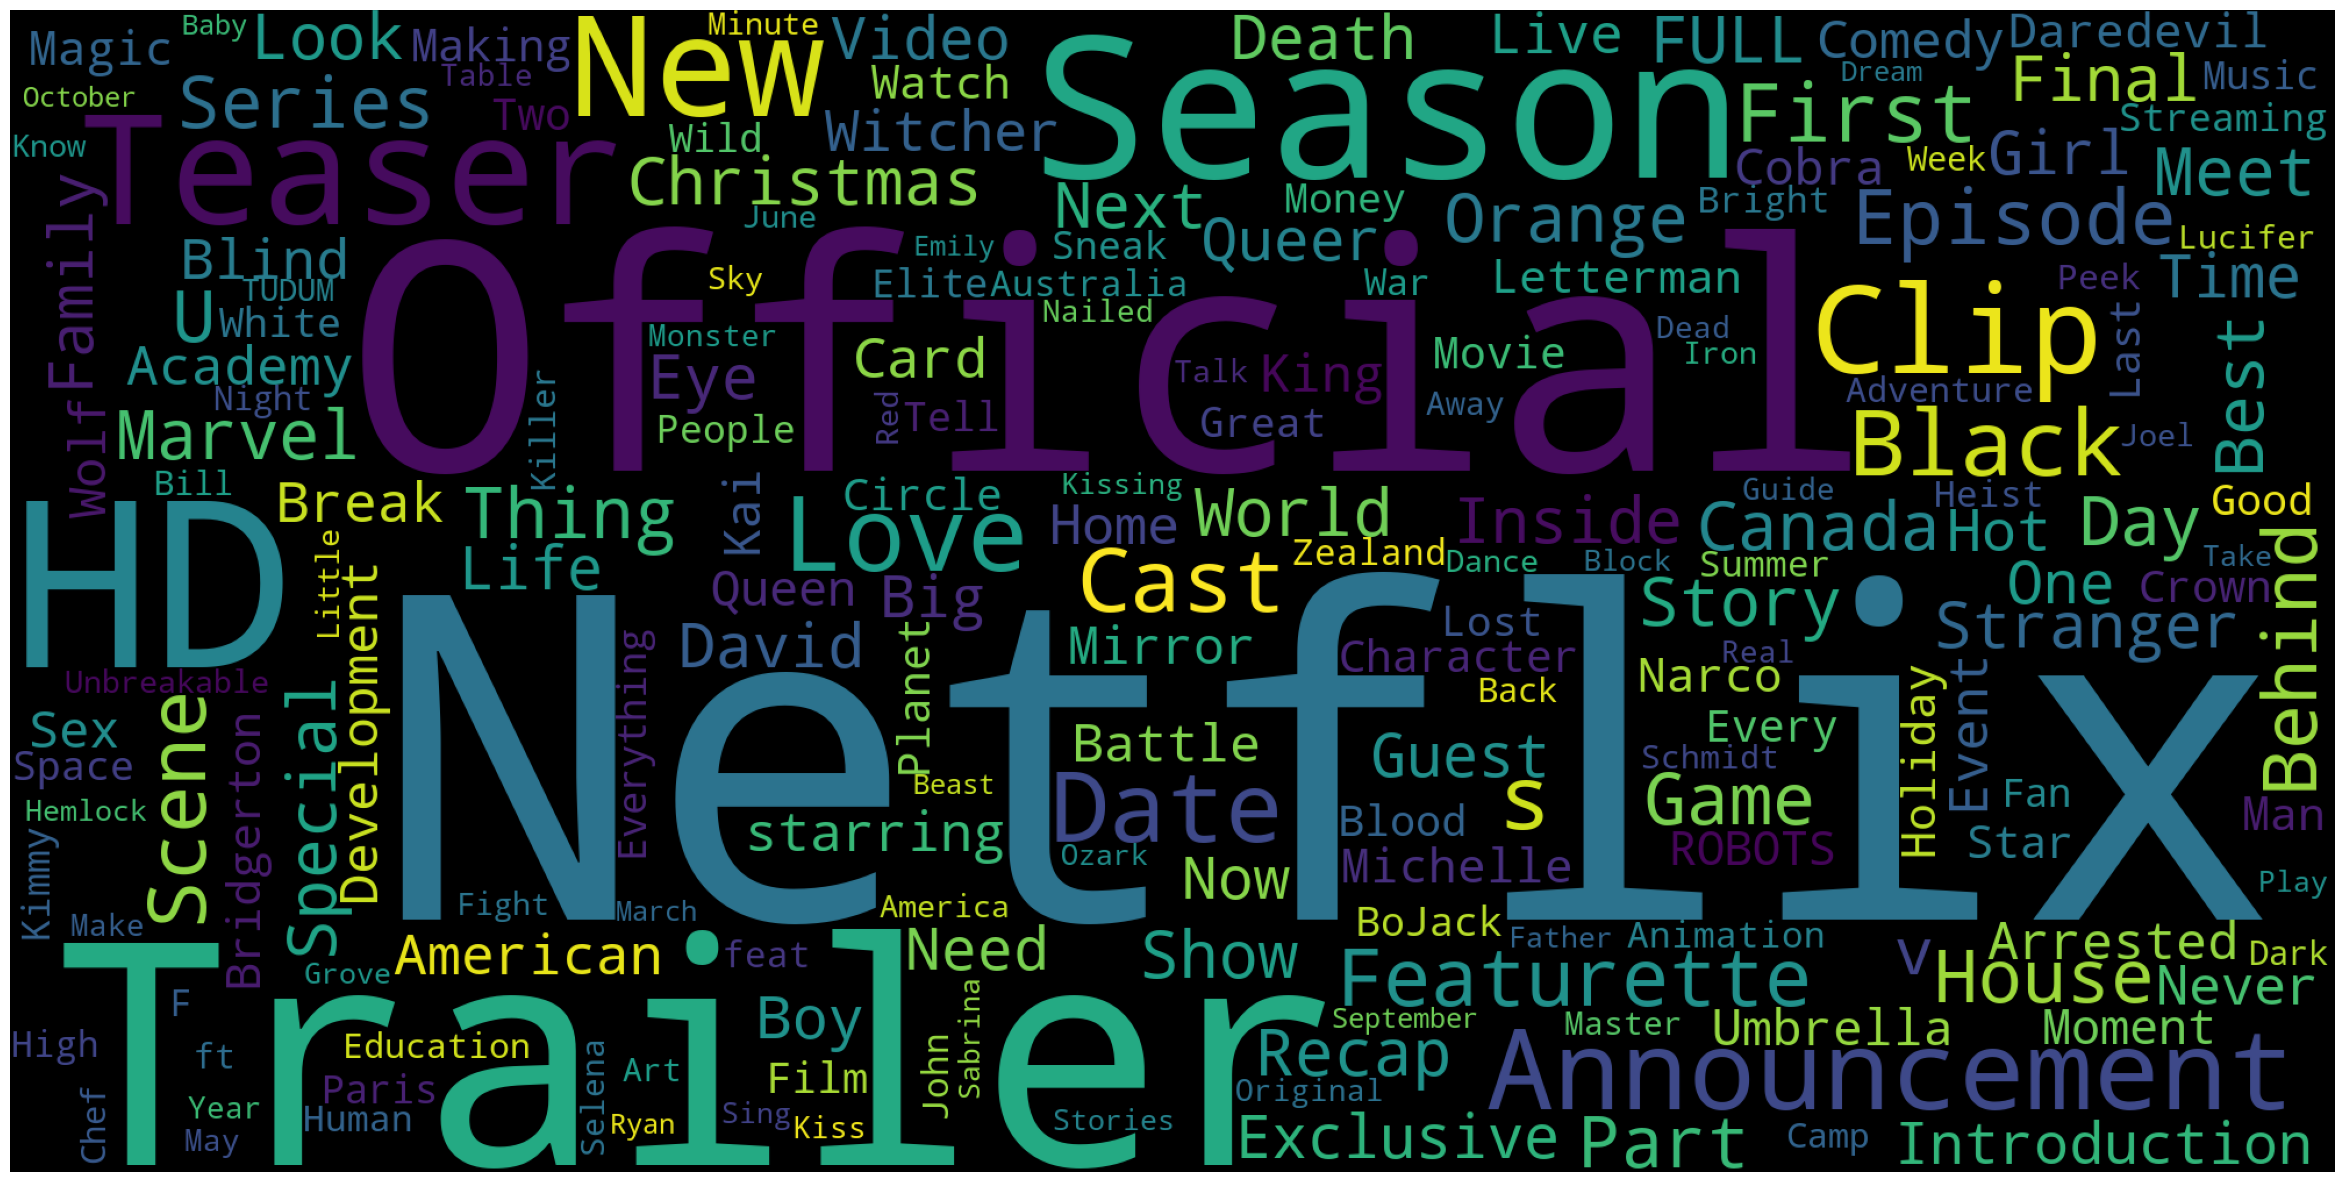

In [ ]:
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [ ]:
video_df.columns

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'duration', 'definition', 'caption', 'durationSecs',
       'title_no_stopwords'],
      dtype='object')